# Project: Wrangling and Analyze Data

## Importing appropriate libraries.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
from timeit import default_timer as timer
import tweepy
from tweepy import OAuthHandler
import requests
from wordcloud import WordCloud
from PIL import Image
from IPython.display import HTML
import os


sns.set()
%matplotlib inline

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
# Code to download twitter archive data as a dataframe.
df_enhanced = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# Code using requests library to download image_predictions.tsv.
url_address = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url_address)
with open('image-predictions.tsv', mode = 'wb') as img_file:
    img_file.write(response.content)

In [4]:
# Code to download image predictions.
df_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
# consumer_key = 'HIDDEN'
# consumer_secret = 'HIDDEN'
# access_token = 'HIDDEN'
# access_secret = 'HIDDEN'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

# # NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# # df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# # change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# # NOTE TO REVIEWER: this student had mobile verification issues so the following
# # Twitter API code was sent to this student from a Udacity instructor
# # Tweet IDs for which to gather additional data via Twitter's API
# tweet_ids = df_1.tweet_id.values
# len(tweet_ids)

# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)

In [6]:




# Source code for help on loading json files.
# https://knowledge.udacity.com/questions/30335

# Code to load json files and to turn json files into pandas dataframes.
tweet_json = []
with open('tweet-json.txt') as json_file:    
        for ln in json_file:         
             tweet_json.append(json.loads(ln))
df_tweet_json = pd.DataFrame(tweet_json, columns=('id', 'retweet_count', 'favorite_count'))

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



## Twitter Archive Enhanced Data:

### Visual Assessment

In [7]:
# Assessing the enhanced data from the first five rows.
df_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [8]:
#Assessing the enhanced data from the last five rows.
df_enhanced.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [9]:
# Accessing the enhanced data from a random sample.
df_enhanced.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
208,852311364735569921,NaN,NaN,2017-04-13 00:03:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Wiggles. She would like you to spot he...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/852311364...,13,10,Wiggles,None,None,None,None
1641,684122891630342144,NaN,NaN,2016-01-04 21:23:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Heartwarming scene of two pups that want nothi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684122891...,11,10,None,None,None,None,None
812,771136648247640064,NaN,NaN,2016-09-01 00:04:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dixie. She wants to be a ship captain....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/771136648...,11,10,Dixie,None,None,None,None
2159,669571471778410496,NaN,NaN,2015-11-25 17:40:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Keith. He's had 13 DUIs. 7/10 that's t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669571471...,7,10,Keith,None,None,None,None
1793,677331501395156992,NaN,NaN,2015-12-17 03:36:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Humphrey. He's a Northern Polyp Viagra. O...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677331501...,9,10,Humphrey,None,None,None,None


### Programmatic Assessement

In [10]:
# Inspecting the columns.
df_enhanced.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [11]:
# Accessing the dtypes.
df_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
#Accessing any null values.
df_enhanced.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [13]:
# Accessing any duplicated values.
df_enhanced.duplicated().sum()

0

In [14]:
#Accessing all number of unique values.
df_enhanced.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [15]:
# Inspecting the name column for irregularities.
df_enhanced['name'].value_counts().head(20)

None       745
a           55
Charlie     12
Lucy        11
Cooper      11
Oliver      11
Lola        10
Penny       10
Tucker      10
Winston      9
Bo           9
the          8
Sadie        8
Daisy        7
Buddy        7
Bailey       7
Toby         7
an           7
Jax          6
Leo          6
Name: name, dtype: int64

In [16]:
# Inspecting rating denominoartor column for values other than the numeric value of 10.
df_enhanced.query("rating_denominator != '10'").count()

tweet_id                      23
in_reply_to_status_id          5
in_reply_to_user_id            5
timestamp                     23
source                        23
text                          23
retweeted_status_id            1
retweeted_status_user_id       1
retweeted_status_timestamp     1
expanded_urls                 19
rating_numerator              23
rating_denominator            23
name                          23
doggo                         23
floofer                       23
pupper                        23
puppo                         23
dtype: int64

In [17]:
# Verifying that the denominator is not 10. 
df_enhanced.query("rating_denominator != '10'").sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1663,682808988178739200,6.827884e+17,4.196984e+09,2016-01-01 06:22:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I'm aware that I could've said 20/16, but here...",NaN,NaN,NaN,NaN,20,16,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
1433,697463031882764288,NaN,NaN,2016-02-10 16:51:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Wednesday here's a bucket of pups. 44/40...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697463031...,44,40,None,None,None,None,None


## Image Predictions:

### Visual Assessment

In [18]:
# Assessing the first 5 rows of the predictions dataset.
df_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [19]:
# Assessing the last 5 rows of the predictions dataset.
df_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [20]:
# Assessing a random sample of 5 rows in the predictions dataset.
df_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
717,685663452032069632,https://pbs.twimg.com/ext_tw_video_thumb/68566...,1,Chesapeake_Bay_retriever,0.171174,True,tennis_ball,0.090644,False,racket,0.048508,False
754,688211956440801280,https://pbs.twimg.com/ext_tw_video_thumb/68821...,1,bannister,0.369449,False,four-poster,0.105307,False,shoji,0.098767,False
396,673656262056419329,https://pbs.twimg.com/media/CVlOy3pW4AQ9H1K.jpg,1,bull_mastiff,0.700625,True,Rhodesian_ridgeback,0.094698,True,Brabancon_griffon,0.057559,True
19,666273097616637952,https://pbs.twimg.com/media/CT8T1mtUwAA3aqm.jpg,1,Italian_greyhound,0.176053,True,toy_terrier,0.111884,True,basenji,0.111152,True
1005,709042156699303936,https://pbs.twimg.com/media/CdcGBB3WwAAGBuU.jpg,1,hotdog,0.826579,False,Rottweiler,0.068179,True,Labrador_retriever,0.049218,True


### Programmatic Assessement

In [21]:
# Assessing the columns of the predictions dataset.
df_predictions.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [22]:
# Assessing the the datatypes of the predictions dataset.
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
# Assessing the null values of the predictions dataset.
df_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [24]:
# Assessing any duplicated values of the predictions dataset.
df_predictions.duplicated().sum()

0

In [25]:
# Assessing the number of unique values in the predictions dataset.
df_predictions.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

## Tweet Json:

### Visual Assessment:

In [26]:
# Assessing the first 5 rows of the Tweet Json dataset.
df_tweet_json.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [27]:
# Assessing the last 5 rows of the Tweet Json dataset.
df_tweet_json.tail()

,id,retweet_count,favorite_count
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132
2353,666020888022790149,532,2535


In [28]:
# Assessing a random sample of 5 rows of the Tweet Json dataset.
df_tweet_json.sample(5)

,id,retweet_count,favorite_count
2130,670079681849372674,1373,2390
585,799774291445383169,5488,0
217,850333567704068097,367,3647
736,780858289093574656,2328,8033
973,750041628174217216,703,3502


### Programmatic Assessment

In [29]:
# Inspecting the columns in the Tweet Json dataset.
df_tweet_json.columns

Index(['id', 'retweet_count', 'favorite_count'], dtype='object')

In [30]:
# Inspecting the dtypes of the Tweet Json dataset.
df_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [31]:
# Inspecting the null values in the Tweet Json dataset.
df_tweet_json.isnull().sum()

id                0
retweet_count     0
favorite_count    0
dtype: int64

In [32]:
# Inspecting any duplicated values in the Tweet Json dataset.
df_tweet_json.duplicated().sum()

0

In [33]:
# Inspecting the number of unique values in the Tweet Json dataset.
df_tweet_json.nunique()

id                2354
retweet_count     1724
favorite_count    2007
dtype: int64

### Quality issues
1. In the twitter archive enhanced data, the timestamp column is set to an object type. It needs to be changed to a timestamp datatype.

2. In the twitter archive enhanced data, the tweet_id column is set to an int64 datatype and needs to be set as an object or string datatype.

3. There are several invalid dog names in the twitter archive enhanced data that need to be removed.

4. In the twitter archive enhanced data, the retweeted rows and replies must be removed in order to remove the unwanted columns. 

5. In the twitter archive enhanced data, there are several columns missing a lot of data and need to be dropped (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp). 

6. The rating_denominator column contains 23 denominators larger than 10, so the numbers need to be replaced with 10 to make them consistent. 

7. In the image predictions data, columns p1, p2, and p3 are inconsistent. Some of the dog names are capitalized, whereas others are lowercase.

8. In the image predictions data, the tweet_id column's datatype needs to be changed from int64 to object or string to match the other tables.

9. In the tweet json data, the id column needs to be changed to tweet_id and converted from an int64 datatype to an object or string data type to match the other tables' id columns. 

### Tidiness issues
1. The dog stages need to be combined into one column, not a separate column for each stage.  

1. The three separate tables need to be merged into a single table to allow for easier data analysis.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [34]:
# Make copies of original pieces of data
df_enhanced_cleaned = df_enhanced.copy()
df_predictions_cleaned = df_predictions.copy()
df_tweet_json_cleaned = df_tweet_json.copy()

### Quality issues

### Issue #1:

#### Define:
> In the twitter archive enhanced data, the timestamp column is set to an object type. It needs to be changed to a timestamp datatype.

#### Code

In [35]:
# Code to convert the timestamp object datatype to a datetime datatype.
df_enhanced_cleaned['timestamp'] = pd.to_datetime(df_enhanced_cleaned['timestamp'])

#### Test

In [36]:
# Code to check on the timestamp datatype to verify the change from the above code.
df_enhanced_cleaned.dtypes

tweet_id                               int64
in_reply_to_status_id                float64
in_reply_to_user_id                  float64
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                  float64
retweeted_status_user_id             float64
retweeted_status_timestamp            object
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
dtype: object

### Issue #2:

#### Define
> In the twitter archive enhanced data, the tweet_id column is set to an int64 datatype and needs to be set as an object or string datatype.

#### Code

In [37]:
df_enhanced_cleaned.tweet_id = df_enhanced_cleaned.tweet_id.astype(str)

#### Test

In [38]:
df_enhanced_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](

### Issue #3

#### Define
> There are several invalid dog names in the twitter archive enhanced data that need to be removed.

#### Code

In [39]:
# Code to replace any lowercased values, None values, or empty string values with np.nan.
df_enhanced_cleaned.loc[df_enhanced_cleaned.name.str.islower(),'name'] = np.nan
df_enhanced_cleaned.loc[df_enhanced_cleaned.name == 'None','name'] = np.nan 
df_enhanced_cleaned.loc[df_enhanced_cleaned.name == '', 'name'] = np.nan

#### Test

In [40]:
df_enhanced_cleaned.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [41]:
df_enhanced_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1502 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](

In [42]:
df_enhanced_cleaned[df_enhanced_cleaned['name'].isnull()].count()

tweet_id                      854
in_reply_to_status_id          77
in_reply_to_user_id            77
timestamp                     854
source                        854
text                          854
retweeted_status_id            70
retweeted_status_user_id       70
retweeted_status_timestamp     70
expanded_urls                 795
rating_numerator              854
rating_denominator            854
name                            0
doggo                         854
floofer                       854
pupper                        854
puppo                         854
dtype: int64

In [43]:
df_enhanced_cleaned.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                           854
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

### Issue #4

#### Define
> In the twitter archive enhanced data, the retweeted rows and replies must be removed in order to remove the unwanted columns. 

#### Code

In [44]:
# Code to remove retweets from the rows before dropping unwanted columns.
# Code source from reviewer required changes specifications.

df_enhanced_cleaned = df_enhanced_cleaned[pd.isnull(df_enhanced_cleaned.retweeted_status_id)]

In [45]:
# Code to remove retweets from the rows before dropping unwanted columns.
# Code source from reviewer required changes specifications.

df_enhanced_cleaned = df_enhanced_cleaned[pd.isnull(df_enhanced_cleaned.in_reply_to_status_id)]

#### Test

In [46]:
df_enhanced_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null datetime64[ns]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          1390 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: datetime64[ns](1), floa

In [47]:
df_enhanced_cleaned.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2097
in_reply_to_user_id           2097
timestamp                        0
source                           0
text                             0
retweeted_status_id           2097
retweeted_status_user_id      2097
retweeted_status_timestamp    2097
expanded_urls                    3
rating_numerator                 0
rating_denominator               0
name                           707
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

### Issue #5:

#### Define
> In the twitter archive enhanced data, there are several columns missing a lot of data and need to be dropped (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp).

#### Code

In [48]:
def drop_data_func(column_name):
    """returns a drop function to drop selected columns from dataset"""
    return df_enhanced_cleaned.drop([column_name], axis = 1, inplace = True)

In [49]:
drop_data_func('in_reply_to_status_id')
drop_data_func('in_reply_to_user_id')
drop_data_func('retweeted_status_id')
drop_data_func('retweeted_status_user_id')
drop_data_func('retweeted_status_timestamp')

#### Test

In [50]:
df_enhanced_cleaned.shape, df_enhanced.shape

((2097, 12), (2356, 17))

In [51]:
df_enhanced_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  1390 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 213.0+ KB


In [52]:
df_enhanced_cleaned.isnull().sum()

tweet_id                0
timestamp               0
source                  0
text                    0
expanded_urls           3
rating_numerator        0
rating_denominator      0
name                  707
doggo                   0
floofer                 0
pupper                  0
puppo                   0
dtype: int64

### Issue #6:

#### Define
> The rating_denominator column contains 23 denominators larger than 10, so the numbers need to be replaced with 10 to make them consistent.

#### Code

In [53]:
df_enhanced_cleaned.rating_denominator = 10

#### Test

In [54]:
# Code to verify that all rows are the number 10.
df_enhanced_cleaned.rating_denominator.value_counts()

10    2097
Name: rating_denominator, dtype: int64

In [55]:
# Code to verify that there is only one unique value in the dataset.
df_enhanced_cleaned['rating_denominator'].nunique()

1

### Issue #7:

#### Define
> In the image predictions data, columns p1, p2, and p3 are inconsistent. Some of the dog names are capitalized, whereas others are lowercase.

#### Code

In [56]:
df_predictions_cleaned.p1 = df_predictions_cleaned.p1.str.lower()
df_predictions_cleaned.p2 = df_predictions_cleaned.p2.str.lower()
df_predictions_cleaned.p3 = df_predictions_cleaned.p3.str.lower()

#### Test

In [57]:
df_predictions_cleaned.p1.value_counts().head(20)

golden_retriever             150
labrador_retriever           100
pembroke                      89
chihuahua                     83
pug                           57
chow                          44
samoyed                       43
toy_poodle                    39
pomeranian                    38
cocker_spaniel                30
malamute                      30
french_bulldog                26
chesapeake_bay_retriever      23
miniature_pinscher            23
seat_belt                     22
siberian_husky                20
german_shepherd               20
staffordshire_bullterrier     20
web_site                      19
cardigan                      19
Name: p1, dtype: int64

### Issue #8:

#### Define
> In the image predictions data, the tweet_id column's datatype needs to be changed from int64 to object or string to match the other tables.

#### Code

In [58]:
df_predictions_cleaned['tweet_id'] = df_predictions_cleaned['tweet_id'].astype(str)

#### Test

In [59]:
df_predictions_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Issue #9:

#### Define
> In the tweet json data, the id column needs to be changed to tweet_id and converted from an int64 datatype to an object or string data type to match the other tables' id columns.

#### Code

In [60]:
df_tweet_json_cleaned['id'] = df_tweet_json_cleaned['id'].astype(str)

In [61]:
df_tweet_json_cleaned.rename(columns = {'id':'tweet_id'}, inplace = True)

#### Test

In [62]:
df_tweet_json_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


### Tidiness issues

### Issue #1:

#### Define:
>  The dog stages need to be combined into one column, not a seperate column for each stage. 

In [63]:
df_enhanced_cleaned.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


#### Code

In [64]:
# Code to replace any none values with empty string value.
df_enhanced_cleaned['doggo'].replace('None', '', inplace = True)
df_enhanced_cleaned['floofer'].replace('None', '', inplace = True)
df_enhanced_cleaned['pupper'].replace('None', '', inplace = True)
df_enhanced_cleaned['puppo'].replace('None', '', inplace = True)

In [65]:
# Code to create a dog_stage column and join values in the above code.
df_enhanced_cleaned['dog_stage'] = df_enhanced_cleaned[df_enhanced_cleaned.columns[8:]].apply(lambda x: ''.join(x), axis = 1)
# Code to replace the empty strings with NaN values.
df_enhanced_cleaned['dog_stage'].replace('',np.nan)
# Code to drop the unwanted columns.
df_enhanced_cleaned.drop(['doggo','floofer','pupper','puppo'], axis = 1,inplace = True)

In [66]:
df_enhanced_cleaned.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
1139,728015554473250816,2016-05-05 00:16:48,"<a href=""http://twitter.com/download/iphone"" r...",This is Rueben. He has reached ultimate pupper...,https://twitter.com/dog_rates/status/728015554...,11,10,Rueben,pupper
1884,674800520222154752,2015-12-10 03:59:15,"<a href=""http://twitter.com/download/iphone"" r...",This is Tedders. He broke his leg saving babie...,https://twitter.com/dog_rates/status/674800520...,11,10,Tedders,
1645,683849932751646720,2016-01-04 03:18:23,"<a href=""http://twitter.com/download/iphone"" r...",This is Jiminy. He's not the brightest dog. Ne...,https://twitter.com/dog_rates/status/683849932...,5,10,Jiminy,
269,841320156043304961,2017-03-13 16:08:50,"<a href=""http://twitter.com/download/iphone"" r...","We don't rate penguins, but if we did, this on...",https://twitter.com/abc/status/841311395547250688,12,10,NaN,
336,832636094638288896,2017-02-17 17:01:29,"<a href=""http://twitter.com/download/iphone"" r...",This is Orion. He just got back from the denti...,https://twitter.com/dog_rates/status/832636094...,12,10,Orion,


#### Test

In [67]:
df_enhanced_cleaned['dog_stage'].value_counts()

                1761
pupper           221
doggo             72
puppo             23
floofer            9
doggopupper        9
doggofloofer       1
doggopuppo         1
Name: dog_stage, dtype: int64

### Issue #2:

#### Define:
> The three seperate tables need to be merged into a single table to allow for easier data analysis.

#### Code

In [68]:
# Code to merge the enhanced table to the predictions table, and then to combined them with the tweet json table on tweet id using an inner join.
df_merge_tables = pd.merge(df_enhanced_cleaned, df_predictions_cleaned, on='tweet_id', how='inner').merge(df_tweet_json_cleaned, on='tweet_id', how='inner' )

#### Test

In [69]:
df_merge_tables
df_merge_tables.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stage',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'retweet_count', 'favorite_count'],
      dtype='object')

In [70]:
df_merge_tables.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,bagel,0.085851,False,banana,0.07611,False,8853,39467


In [71]:
df_merge_tables.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 22 columns):
tweet_id              1971 non-null object
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1349 non-null object
dog_stage             1971 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null int64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null bool
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null bool
p3                    1971 non-null object
p3_conf               1971 non-null float64
p3_dog                1971 non-null bool
retweet_count         1971 non-

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [72]:
# Code to merge the three datasets into one master csv file.
df_merge_tables.to_csv('twitter_archive_master.csv', index=False)
df_merge_tables.copy()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,6514,33819
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,9774,41048
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,...,0.425595,True,irish_terrier,0.116317,True,indian_elephant,0.076902,False,3261,20562
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,...,0.341703,True,border_collie,0.199287,True,ice_lolly,0.193548,False,2158,12041
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,...,0.566142,True,eskimo_dog,0.178406,True,pembroke,0.076507,True,16716,56848
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,...,0.487574,True,irish_setter,0.193054,True,chesapeake_bay_retriever,0.118184,True,4429,28226
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,...,0.511319,True,cardigan,0.451038,True,chihuahua,0.029248,True,7711,32467


## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:
1. Which dog breed prediction algorithm was the most accurate?

2. What were the top 20 dog names in the tweet dataset? 

3. Which year had the most active tweet favorite count interaction? 

#### Insight 1: Dog breed prediciton algorithms:

In [73]:
def predictions_accuracy(p_num_dog):
    """Enter the dog breed algorithm to return a proportion of its accuracy"""
    return df_merge_tables[p_num_dog].value_counts()

In [74]:
predictions_accuracy("p1_dog")

True     1463
False     508
Name: p1_dog, dtype: int64

In [75]:
predictions_accuracy("p2_dog")

True     1480
False     491
Name: p2_dog, dtype: int64

In [76]:
predictions_accuracy("p3_dog")

True     1431
False     540
Name: p3_dog, dtype: int64

#### Insight 2: Top 20 dog names:

In [77]:
# Code to create an object to store the name column after droping na values.
subset = df_merge_tables['name'].dropna()

In [78]:
df_merge_tables['name'].describe()

count        1349
unique        912
top       Charlie
freq           11
Name: name, dtype: object

In [79]:
subset = df_merge_tables['name'].value_counts().nlargest(20)

In [80]:
# Verifying that the NA values are dropped.
subset

Charlie    11
Cooper     10
Lucy       10
Oliver     10
Penny       9
Tucker      9
Winston     8
Sadie       8
Daisy       7
Toby        7
Lola        7
Stanley     6
Koda        6
Bo          6
Bella       6
Jax         6
Rusty       5
Chester     5
Louis       5
Bailey      5
Name: name, dtype: int64

In [81]:
def year_favorite ():
    """Function to group by year and favorite count"""
    return df_merge_tables.groupby(df_merge_tables['timestamp'].dt.year)['favorite_count'].count()

In [82]:
year_favorite()

timestamp
2015    655
2016    962
2017    354
Name: favorite_count, dtype: int64

### Visualization

#### Insight 1: Dog breed prediciton algorithms:

##### Algorithm 1:

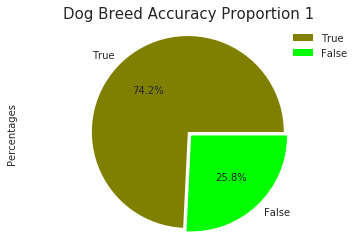

In [83]:
# Code to generate the pie chart for p1_dog predictions.
predictions_accuracy('p1_dog').plot(kind="pie", colors=["olive", "lime"], autopct="%.1f%%", explode=(0, 0.05))
plt.ylabel('Percentages', size = '10')
plt.title("Dog Breed Accuracy Proportion 1", size = '15')
plt.legend()
plt.axis('equal')
plt.show()


##### Algorithm 2:

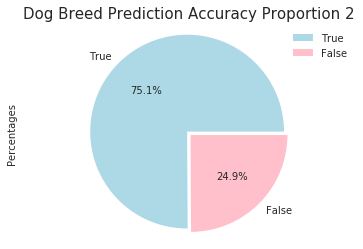

In [84]:
# Code to generate the pie chart for p2_dog predictions.
predictions_accuracy('p2_dog').plot(kind="pie", colors=["lightblue", "pink"], autopct="%.1f%%", explode=(0, 0.05))
plt.ylabel('Percentages', size = '10')
plt.title("Dog Breed Prediction Accuracy Proportion 2", size = '15')
plt.legend()
plt.axis('equal')
plt.show()

##### Algorithm 3:

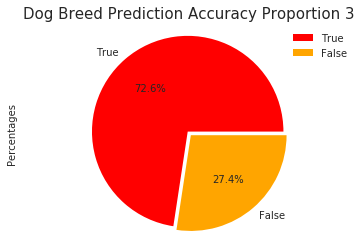

In [85]:
# Code to generate the pie chart for p3_dog predictions.
predictions_accuracy('p3_dog').plot(kind="pie", colors=["red", "orange"], autopct="%.1f%%", explode=(0, 0.05))
plt.ylabel('Percentages', size = '10')
plt.title("Dog Breed Prediction Accuracy Proportion 3", size = '15')
plt.legend()
plt.axis('equal')
plt.show()

#### Insight 2: Top 20 dog names:

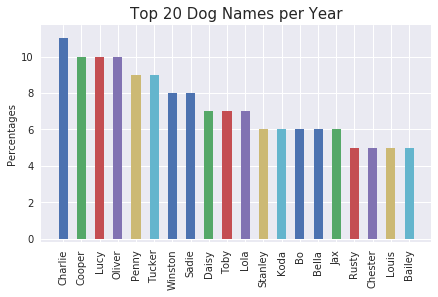

In [86]:
# Code to generate the bar chart for top 20 dog names.
subset.plot(kind='bar', figsize = (7,4))
plt.ylabel('Percentages', size = '10')
plt.title("Top 20 Dog Names per Year", size = '15')
plt.axis('equal')
plt.show()

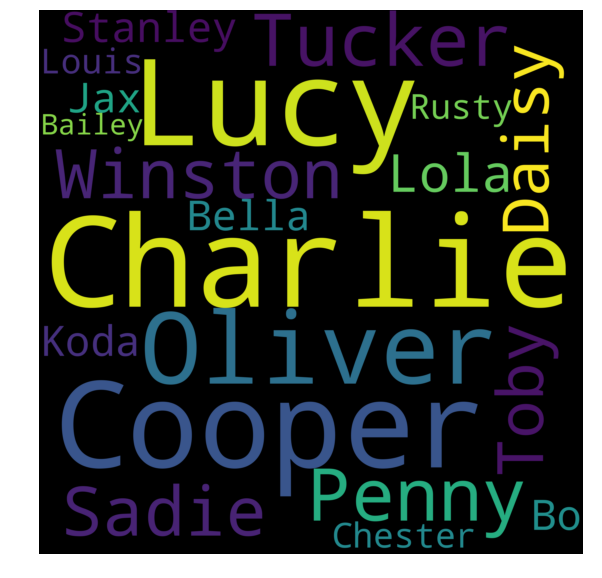

In [87]:
# Code to create a wordcloud to hold the top 20 dog names.
mystring_wordcloud = WordCloud(background_color='black', height=5000, width=5000).generate_from_frequencies(subset)

plt.figure(figsize = (10,10))
plt.imshow(mystring_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Insight 3: Favorite tweet count per year:

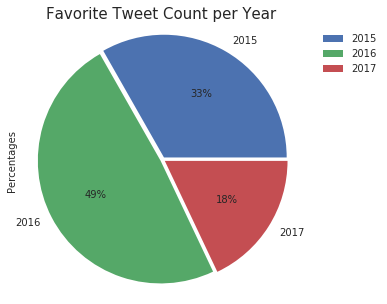

In [88]:
# Code to create a pie chart to show the favorite tweet count per year.
year_favorite().plot(kind='pie', figsize = (5, 5), explode = (.02, .02, .02), autopct='%1.0f%%')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.ylabel('Percentages', size = '10')
plt.title("Favorite Tweet Count per Year", size = '15')
plt.axis('equal')
plt.show()

## Sources used:
Pandas: https://pandas.pydata.org/docs/

Matplotlib: https://matplotlib.org/stable/index.html

NumPy: https://numpy.org/doc/

Seaborn: https://seaborn.pydata.org/

GeeksforGeeks: https://www.geeksforgeeks.org/pandas-tutorial/

W3Schools: https://www.w3schools.com/python/pandas/default.asp

Appsloveworld: https://www.appsloveworld.com/pandas/100/143/categorize-age-into-another-column-age-group

In [89]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'wrangle_act.ipynb'])

0